## Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#### Uploaded Dataset

In [66]:
df=pd.read_csv("/content/insurance_data.csv")

In [67]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


### Exploratory Data Analysis

In [68]:
numerical_cols = df.select_dtypes(include="number")
numerical_cols

,age,weight,height,income_lpa
0,67,119.8,1.56,2.92000
1,36,101.1,1.83,34.28000
2,39,56.8,1.64,36.64000
3,22,109.4,1.55,3.34000
4,69,62.2,1.60,3.94000
...,...,...,...,...
995,36,52.8,1.57,19.64000
996,26,113.8,1.54,34.01000
997,52,60.8,1.80,44.86000
998,27,101.1,1.82,28.30000


In [69]:
categorical_cols = df.select_dtypes(include="object")
categorical_cols

,city,occupation,insurance_premium_category
0,Jaipur,retired,High
1,Chennai,freelancer,Low
2,Indore,freelancer,Low
3,Mumbai,student,Medium
4,Indore,retired,High
...,...,...,...
995,Indore,business_owner,Low
996,Delhi,private_job,Low
997,Hyderabad,freelancer,Low
998,Kolkata,business_owner,Low


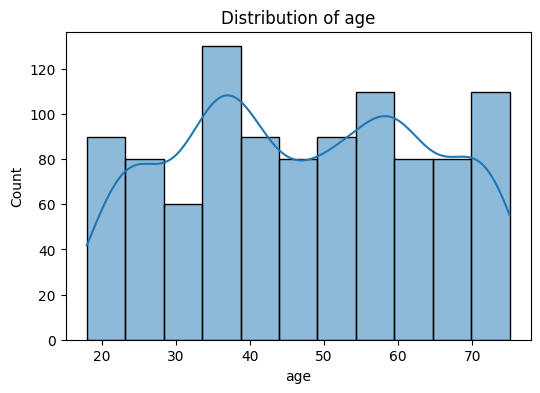

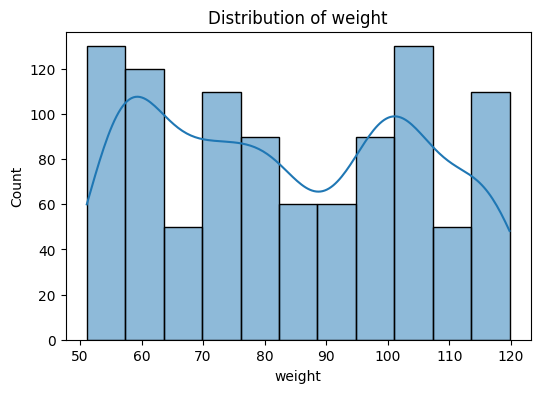

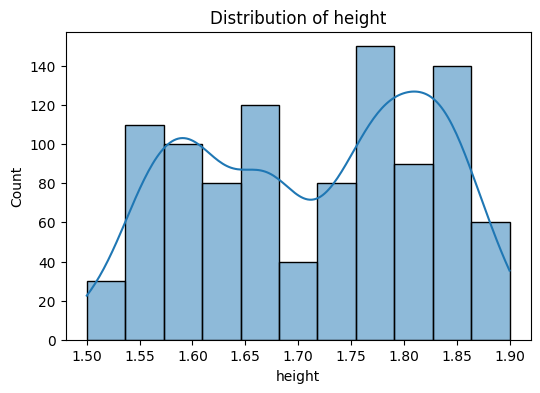

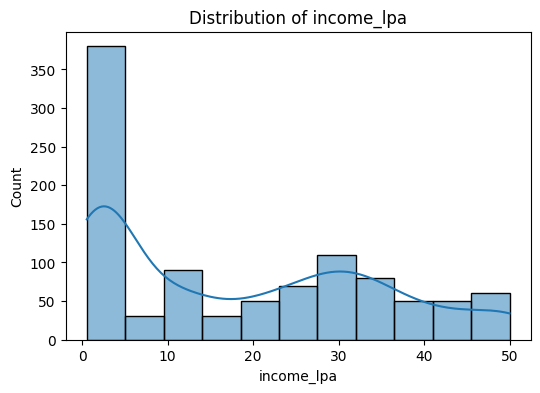

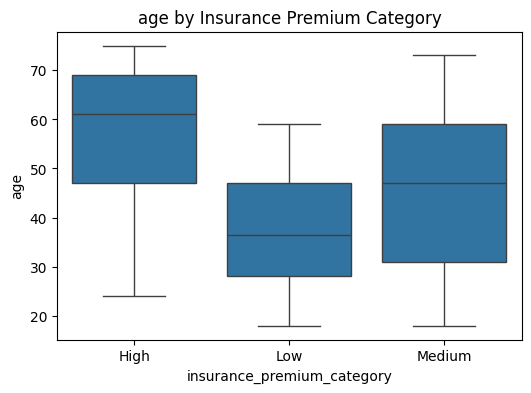

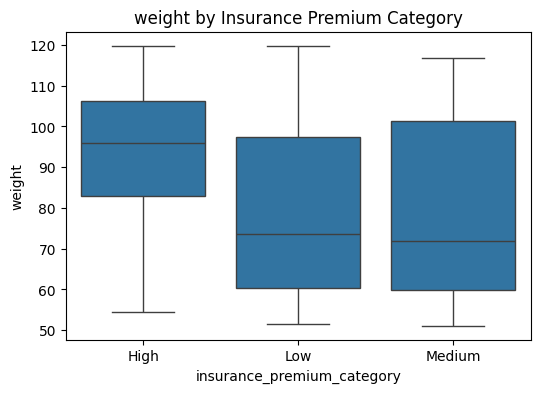

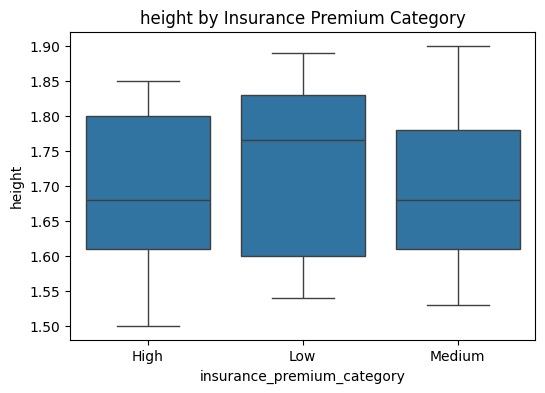

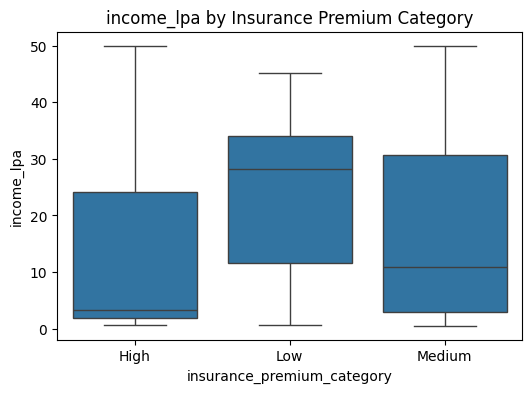

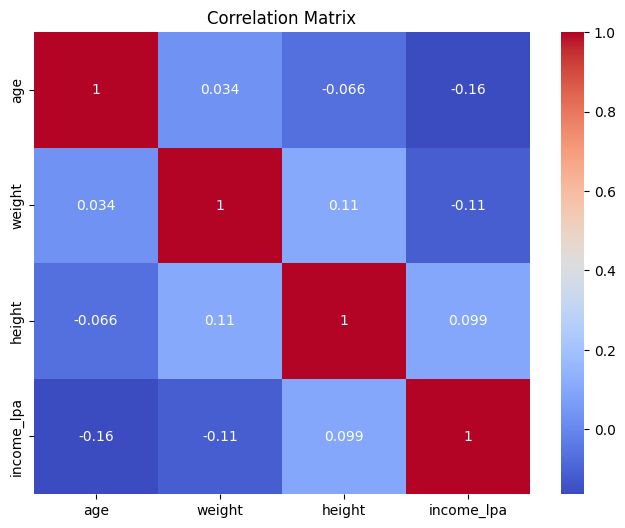

In [70]:
numerical_cols = ['age', 'weight', 'height', 'income_lpa']

# Distribution plots
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots per category
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='insurance_premium_category', y=col, data=df)
    plt.title(f"{col} by Insurance Premium Category")
    plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



🔢 Value counts for smoker
smoker
False    570
True     430
Name: count, dtype: int64

🔢 Value counts for city
city
Jaipur        90
Indore        90
Chandigarh    90
Lucknow       90
Jalandhar     90
Delhi         80
Chennai       70
Mumbai        70
Kota          60
Hyderabad     60
Mysore        60
Kolkata       50
Pune          40
Bangalore     40
Gaya          20
Name: count, dtype: int64

🔢 Value counts for occupation
occupation
retired           260
unemployed        150
government_job    140
student           120
freelancer        110
business_owner    110
private_job       110
Name: count, dtype: int64


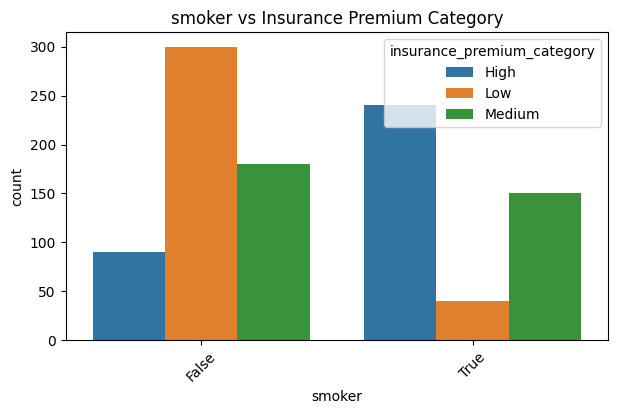

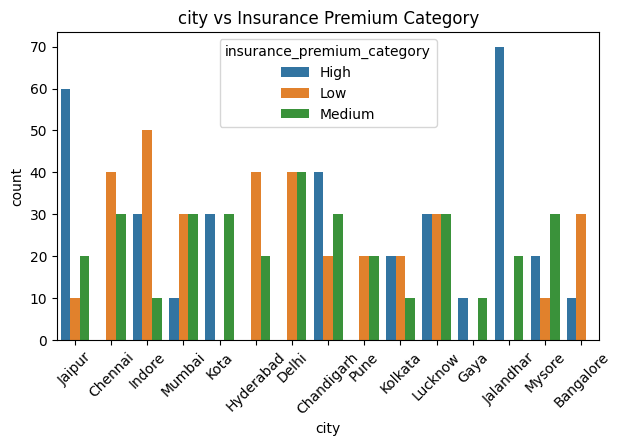

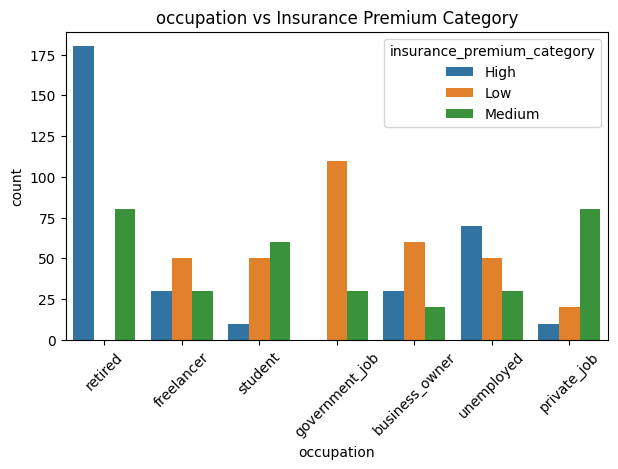

In [71]:
categorical_cols = ['smoker', 'city', 'occupation']

# Value counts
for col in categorical_cols:
    print(f"\n🔢 Value counts for {col}")
    print(df[col].value_counts())

# Count plots
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df, hue='insurance_premium_category')
    plt.title(f"{col} vs Insurance Premium Category")
    plt.xticks(rotation=45)
    plt.show()



🎯 Target Variable Distribution
insurance_premium_category
Low       340
High      330
Medium    330
Name: count, dtype: int64


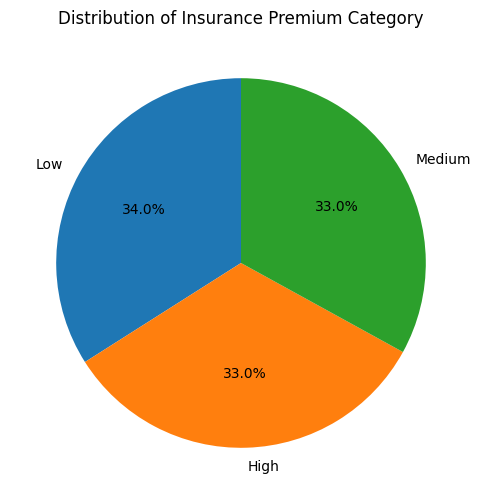

In [72]:
# Value counts
print("\n🎯 Target Variable Distribution")
print(df['insurance_premium_category'].value_counts())

# Pie chart
plt.figure(figsize=(6,6))
df['insurance_premium_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Insurance Premium Category")
plt.ylabel('')
plt.show()


## Feature Engineering

In [73]:
df_feat = df.copy()

In [74]:
df_feat['bmi'] = df_feat['weight']/(df_feat["height"]**2)

In [75]:
def age_group(age):
  if age < 25:
    return "young"
  elif age < 45:
    return "adult"
  elif age < 65:
    return "middle_aged"
  else:
    return "senior"

In [76]:
df_feat["age_group"] = df_feat["age"].apply(age_group)

In [77]:
def lifestyle_risk(row):
  if row["smoker"] and row["bmi"] > 20:
    return "high"
  elif row["smoker"] and row["bmi"] > 27:
    return "medium"
  else:
    return "low"

In [78]:
df_feat["lifestyle_risk"] = df_feat.apply(lifestyle_risk, axis=1)

In [79]:
tier_1_cities = ["Mumbai", "Delhi", "Banglore", "Chennai", "Kolkata", "Hyderabad", "Pune"]
tier_2_cities = ["Jaipur", "Chandigarh", "Indore", "Lucknow", "Patna", "Ranchi", "Vishakhapatnam", "Sasaram", "Dehri",
                 "Bhopal", "Nagpur", "Vadodra", "Surat", "Rajkot", "Jodhpur", "Varanasi", "Raipur", "Amritsar", "Agra",
                 "Dehradun", "Mysore", "jabalpur", "Guwahati", "Thiruvanathapuram", "Ludhiana", "Nasik", "Allahabad", "Udaipur",
                 "Aurangabad", "Hubli", "Belgaum", "Salem", "Vijaywada", "Tiruchirappalli", "Bhavnagar","Gawalior","Dhanbad","Barailey",
                 "Aligarh", "Gaya","Kozikhodo", "Warangal", "Kolhapur", "Belaspur", "Jalandhar", "Guntur", "Asansol", "Siliguri"]

In [80]:
def city_tier(city):
  if city in tier_1_cities:
    return 1
  elif city in tier_2_cities:
    return 2
  else:
    return 3

In [81]:
df_feat['city_tier'] = df_feat["city"].apply(city_tier)

In [82]:
df_feat.drop(columns=['age','weight', 'height', 'smoker','city'])[['income_lpa', 'occupation', "bmi", 'age_group','lifestyle_risk', 'city_tier','insurance_premium_category']]

,income_lpa,occupation,bmi,age_group,lifestyle_risk,city_tier,insurance_premium_category
0,2.92000,retired,49.227482,senior,low,2,High
1,34.28000,freelancer,30.189017,adult,low,1,Low
2,36.64000,freelancer,21.118382,adult,low,2,Low
3,3.34000,student,45.535900,young,high,1,Medium
4,3.94000,retired,24.296875,senior,high,2,High
...,...,...,...,...,...,...,...
995,19.64000,business_owner,21.420747,adult,low,2,Low
996,34.01000,private_job,47.984483,adult,low,1,Low
997,44.86000,freelancer,18.765432,middle_aged,low,1,Low
998,28.30000,business_owner,30.521676,adult,low,1,Low


In [83]:
X=df_feat[['bmi', 'age_group', 'lifestyle_risk', 'city_tier','income_lpa','occupation']]
y=df_feat["insurance_premium_category"]

In [84]:
categorical_features=["age_group", "lifestyle_risk","occupation", "city_tier"]
numerical_features=["bmi", "income_lpa"]

### Column Transformer

In [85]:
preprocessor=ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', 'passthrough', numerical_features)
])


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree Pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


### Train-Test Split

In [87]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit and Predict using different models

In [88]:
# Fit models
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

# Predict
rf_preds = rf_pipeline.predict(X_test)
lr_preds = lr_pipeline.predict(X_test)
dt_preds = dt_pipeline.predict(X_test)


In [89]:
# Random Forest
print("🌲 Random Forest:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("-" * 60)

# Logistic Regression
print("📉 Logistic Regression:")
print(classification_report(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("-" * 60)

# Decision Tree
print("🌳 Decision Tree:")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("-" * 60)


🌲 Random Forest:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        69
         Low       1.00      1.00      1.00        69
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0
------------------------------------------------------------
📉 Logistic Regression:
              precision    recall  f1-score   support

        High       0.97      1.00      0.99        69
         Low       0.86      0.86      0.86        69
      Medium       0.83      0.81      0.82        62

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Accuracy: 0.89
------------------------------------------------------------
🌳 Decision Tree:
              precision    rec

## Exported model.pkl

In [90]:
import pickle
pickle_model_path="model.pkl"
with open(pickle_model_path, 'wb') as file:
    pickle.dump(rf_pipeline, file)